In [216]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [217]:
# the dataset is donloaded from kggle 
# read the dataset

df = pd.read_csv("cancer patient data sets.csv")  # reading dataset
df1 = df # for later use


In [218]:
# Clean the dataset

# reomve patient id from dataset as it is irrevalent to machine learning model
df.drop("Patient Id", axis=1, inplace=True) 
# rename the columns so that all the names are in lower case
df.rename(columns=str.lower, inplace=True)
# Replace spaces in column names with _ 
df.rename(columns={col: col.replace(" ", "_") for col in df.columns}, inplace=True)
# check the data for null values
# df.isnull().sum()s

In [219]:
# one column of the dataset has non numerical value
# convert non numerical data to numerical value

# all the data in the dataset needs to be in numerical form to be passed to the machine learning model
# Finding types of non numerical data and assigning numerical value to them 
print(df["level"])
# replace high, medium, low with 0,1,2
df["level"].replace({'High': 2, 'Medium': 1, 'Low': 0}, inplace=True)
# print(df["level"])

0         Low
1      Medium
2        High
3        High
4        High
        ...  
195    Medium
196    Medium
197    Medium
198      High
199      High
Name: level, Length: 200, dtype: object


In [220]:
# finding which parameters are relevant to be correlated with cancer level in patients

# print(df.columns)

columns = ['age', 'gender', 'air_pollution', 'alcohol_use',
       'dust_allergy', 'occupational_hazards', 'genetic_risk',
       'chronic_lung_disease', 'balanced_diet', 'obesity', 'smoking',
       'passive_smoker', 'chest_pain', 'coughing_of_blood', 'fatigue',
       'weight_loss', 'shortness_of_breath', 'wheezing',
       'swallowing_difficulty', 'clubbing_of_finger_nails', 'frequent_cold',
       'dry_cough', 'snoring']

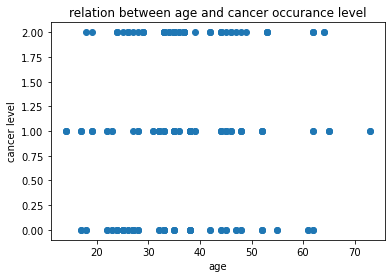

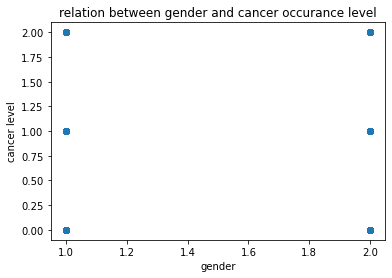

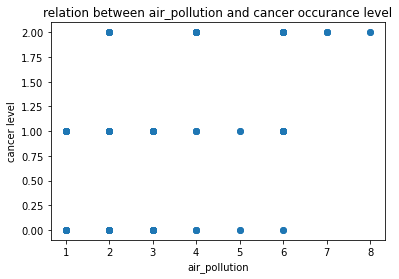

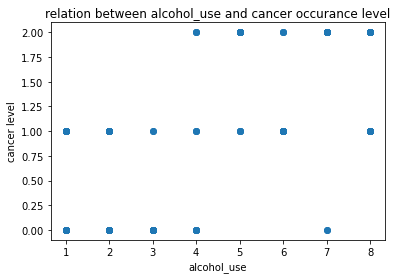

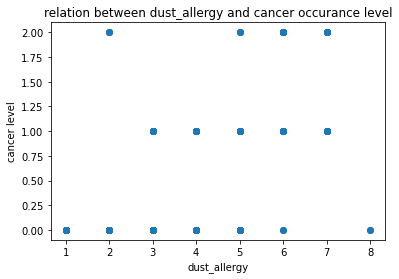

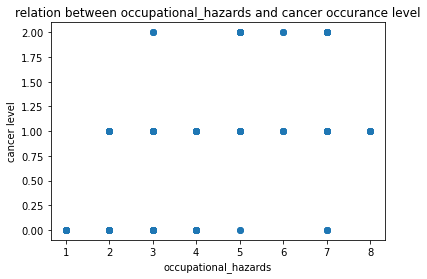

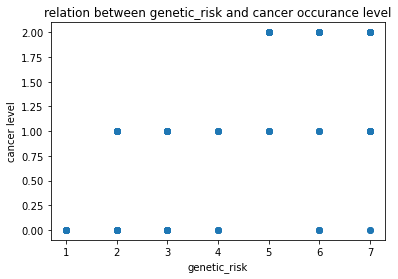

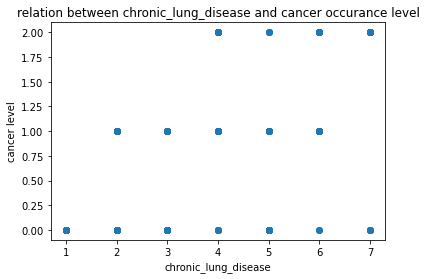

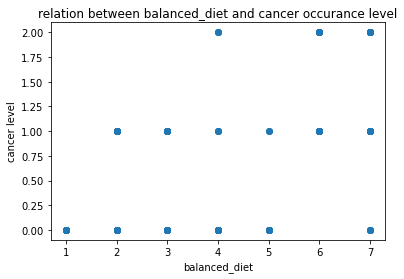

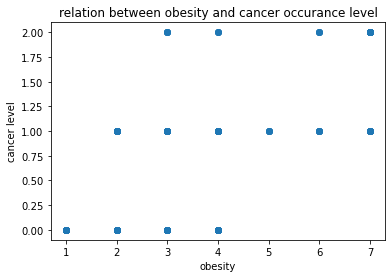

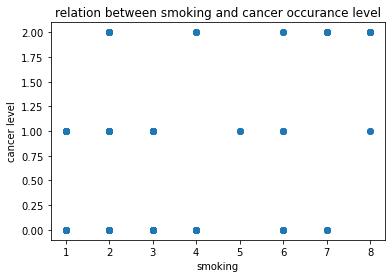

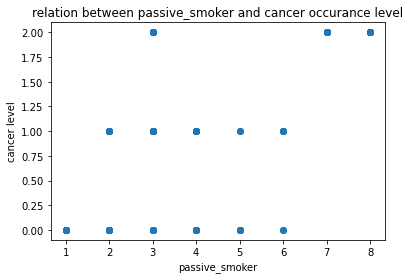

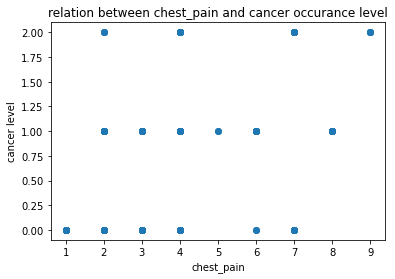

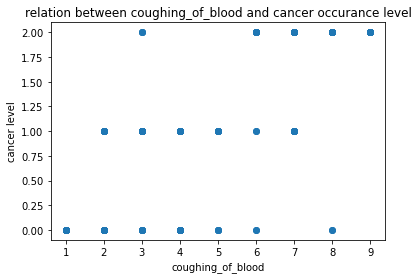

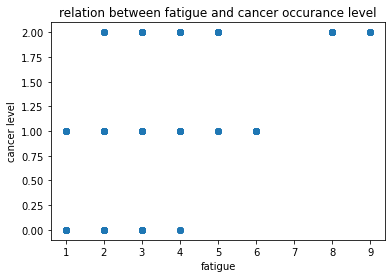

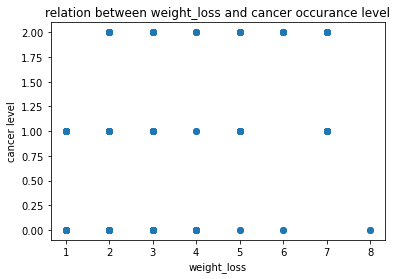

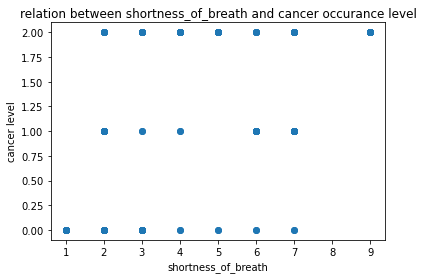

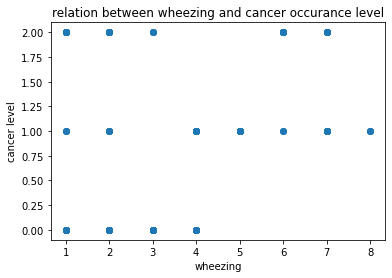

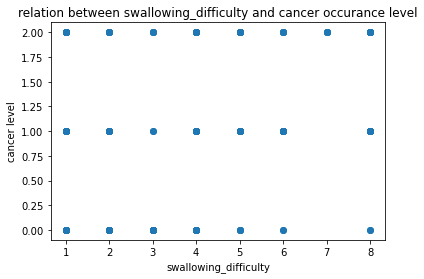

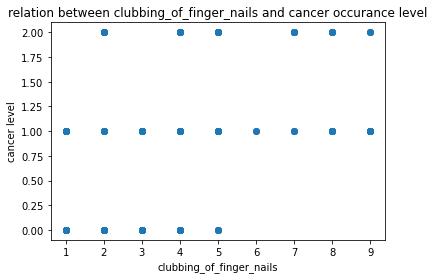

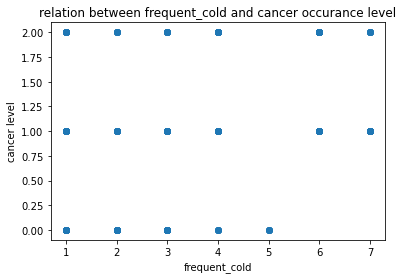

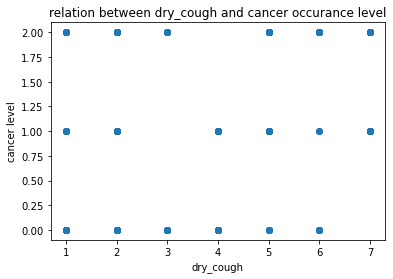

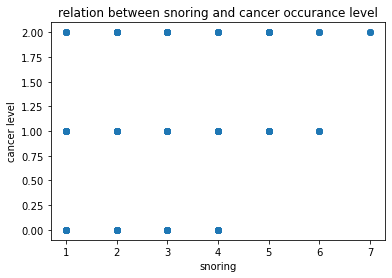

In [221]:
# plot the relevat variable with cancer occurance provability level
for column in columns:
    plt.scatter(df[column], df["level"])
    plt.xlabel(column)
    plt.ylabel("cancer level")
    plt.title("relation between "+column+" and cancer occurance level")
    plt.show()

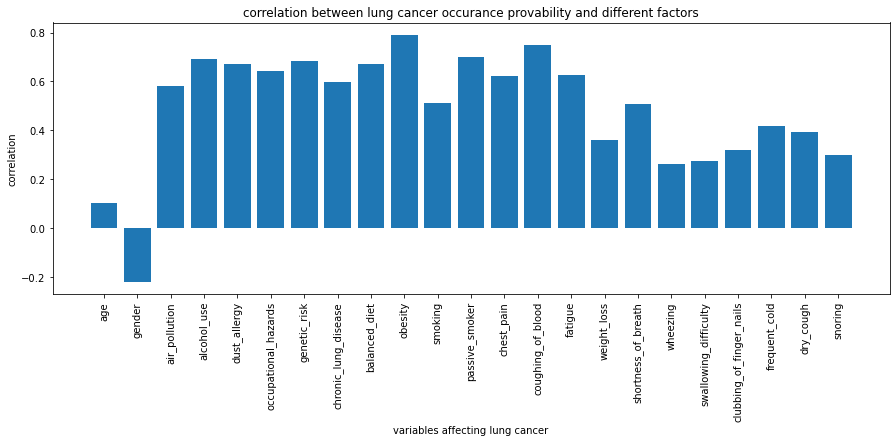

In [222]:
# correlating relevant data to determine what data to feed to machine learning model nad which to remove

df2 = df1.corr()
# print(df2)
fig = plt.figure(figsize =(15, 5))
plt.bar(df2.index[1:-1],df2.level[1:-1])
plt.ylabel("correlation")
plt.xlabel("variables affecting lung cancer")
plt.title("correlation between lung cancer occurance provability and different factors")
plt.xticks(rotation='vertical')
plt.show()
# according to the dataset male gender is represented by 1 and female is represented by 2 
# it can be seen that all other variables have positive correlation to lung cancer occurance provability other than gender
# gerner has negative correlation to the lung concer occurance provability
# it can be seen from the correlation that females are less likely to have lung cancer than men

In [223]:
# process the data for training

X = df.drop(columns='level')
Y = df.level
# split dataset into training and testing dataset

# import library from sklearn to split data ino test and train dataset
from sklearn.model_selection import train_test_split

# use 50% data as test set and 50% as training set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=40) # random state is set to a fixed no to replicate the same dataset selection every time data is splitted between train data and test data
# print('Train Shape')
# print('X train shape: ', X_train.shape)
# print('Y train shape: ', Y_train.shape)
# print('Test Shape')
# print('X test shape: ', X_test.shape)
# print('Y test shape: ', Y_test.shape)

# scaling data to feed to neural network 

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

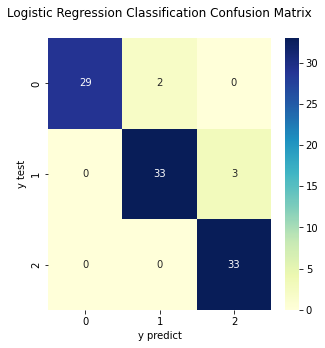

Classification Tree for Decision Tree
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        31
           1       0.94      0.92      0.93        36
           2       0.92      1.00      0.96        33

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100

Logistic Regression Score =  0.95


In [224]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, Y_train)
Y_predict1 = logreg.predict(X_test_scaled)


# a_list = list(range(0, 200))
# Regression_DF = pd.DataFrame(Y_test)
# Regression_DF["predicted"] = Y_predict1 
# Regression_DF["index"] = a_list 
# Regression_DF.set_index('index')
# plt.scatter(Regression_DF["index"],Regression_DF["predicted"])
# plt.show()
# plt.scatter(Regression_DF["index"],Regression_DF["level"])
# plt.show()

# Confusion Matrix
from sklearn.metrics import confusion_matrix
logreg_cm = confusion_matrix(Y_test, Y_predict1)
f, ax = plt.subplots(figsize=(5,5))
seaborn.heatmap(logreg_cm, annot=True, cmap="YlGnBu")
plt.title('Logistic Regression Classification Confusion Matrix\n')
plt.xlabel('y predict')
plt.ylabel('y test')
plt.show()


# Classification Report
from sklearn.metrics import classification_report
print('Classification Tree for Decision Tree')
print(classification_report(Y_test, Y_predict1))

# score
score_logreg = logreg.score(X_test_scaled, Y_test)
print('Logistic Regression Score = ',score_logreg)

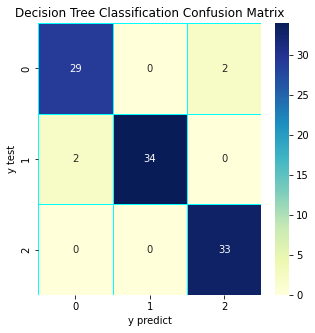

Classification Tree for Decision Tree
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        31
           1       1.00      0.94      0.97        36
           2       0.94      1.00      0.97        33

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100

Decision tree Score =  0.96


In [225]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
dtcla = DecisionTreeClassifier()
dtcla.fit(X_train_scaled, Y_train)
y_predict2 = dtcla.predict(X_test_scaled)

# Confusion Matrix
dtcla_cm = confusion_matrix(Y_test, y_predict2)
f, ax = plt.subplots(figsize=(5,5))
seaborn.heatmap(dtcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Decision Tree Classification Confusion Matrix')
plt.xlabel('y predict')
plt.ylabel('y test')
plt.show()

# Classification Report
print('Classification Tree for Decision Tree')
print(classification_report(Y_test, y_predict2))

# score
score_Dtree = dtcla.score(X_test_scaled, Y_test)
print('Decision tree Score = ',score_Dtree)

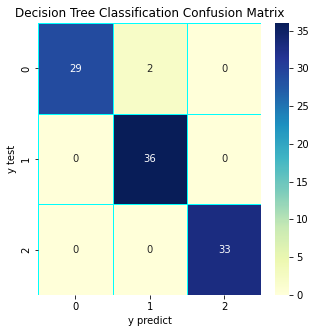

Classification Tree for Decision Tree
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        31
           1       0.95      1.00      0.97        36
           2       1.00      1.00      1.00        33

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100

SVM Score =  0.98


In [226]:
# support vector machine

from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
clf.fit(X_train_scaled, Y_train)
#Predict the response for test dataset
y_predict3 = clf.predict(X_test_scaled)

# Confusion Matrix
svm_cm = confusion_matrix(Y_test, y_predict3)
f, ax = plt.subplots(figsize=(5,5))
seaborn.heatmap(svm_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Decision Tree Classification Confusion Matrix')
plt.xlabel('y predict')
plt.ylabel('y test')
plt.show()

# Classification Report
print('Classification Tree for Decision Tree')
print(classification_report(Y_test, y_predict3))

# score
score_svm = clf.score(X_test_scaled, Y_test)
print('SVM Score = ',score_svm)

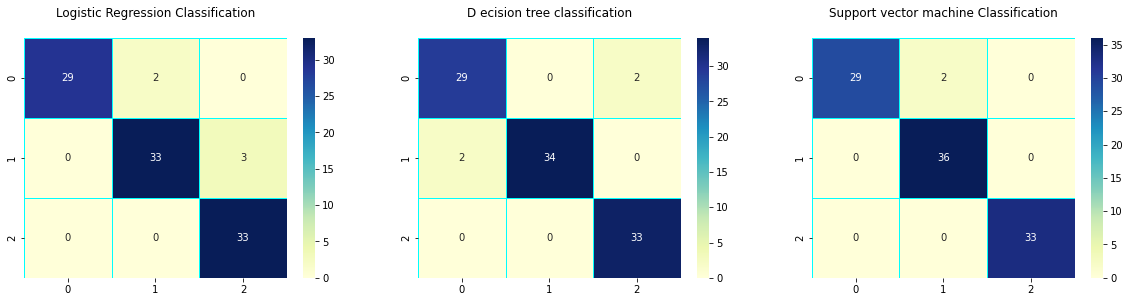

In [227]:
# confusion matrices comparison

fig = plt.figure(figsize=(20,15))
# plt.xlabel("Y_predict")
# plt.ylabel("Y_test")
ax1 = fig.add_subplot(3, 3, 1) 
ax1.set_title('Logistic Regression Classification\n') 
ax2 = fig.add_subplot(3, 3, 2)
ax2.set_title('D ecision tree classification\n')
ax3 = fig.add_subplot(3, 3, 3)
ax3.set_title('Support vector machine Classification\n')

seaborn.heatmap(data=logreg_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax1)
seaborn.heatmap(data=dtcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax2)
seaborn.heatmap(data=svm_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax3)

plt.show()

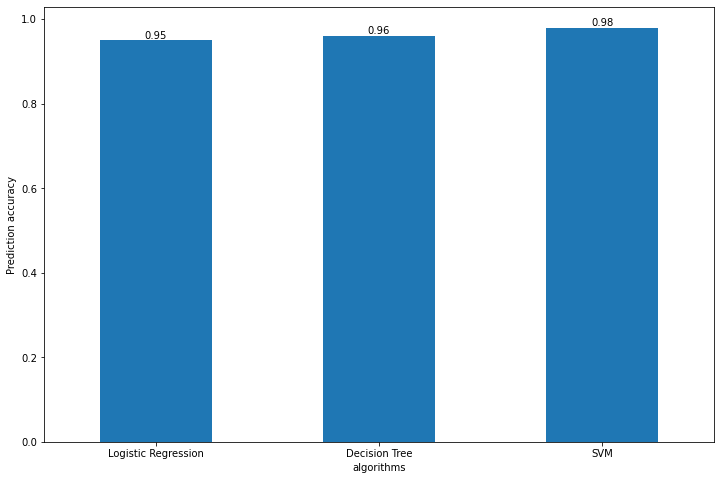

In [228]:
# Test scores comparison

x=['Logistic Regression', 'Decision Tree', 'SVM']
y = [score_logreg, score_Dtree, score_svm]
y_series = pd.Series(y)

# Plot the figure.
plt.figure(figsize=(12, 8))
fig = y_series.plot(kind='bar')
fig.set_xticklabels(x,rotation = "horizontal")
fig.bar_label(fig.containers[0], label_type='edge')
fig.set_xlabel("algorithms")
fig.set_ylabel("Prediction accuracy")
plt.show()